# **MARKETING MIX MODELING**

1. Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import Libraries

In [2]:
#Miscellaneous operating system interfaces¶
import os

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

3. Reading file from *Kaggle*


In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Connected Data'

In [5]:
# copying an API command from https://www.kaggle.com/sazid28/advertising.csv
!kaggle datasets download -d sazid28/advertising.csv


  0% 0.00/2.18k [00:00<?, ?B/s]
100% 2.18k/2.18k [00:00<00:00, 3.74MB/s]


4. Unzip the file

In [9]:
!unzip advertising.csv.zip

Archive:  advertising.csv.zip
  inflating: Advertising.csv         


5. Getting the csv file

In [11]:
advertising_df = pd.read_csv("Advertising.csv")

6. Displaying few rows from the dataframe

In [12]:
advertising_df.head(7)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8


7. Data Cleaning

In [13]:
#dimension
advertising_df.shape

(200, 5)

200 records - 5 columns

In [14]:
#datatypes
advertising_df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [15]:
#sum of missing values per column
advertising_df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There are no missing values in the data.

## Correlation Matrix

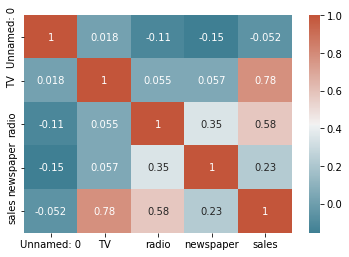

In [16]:
corr = advertising_df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap=True))

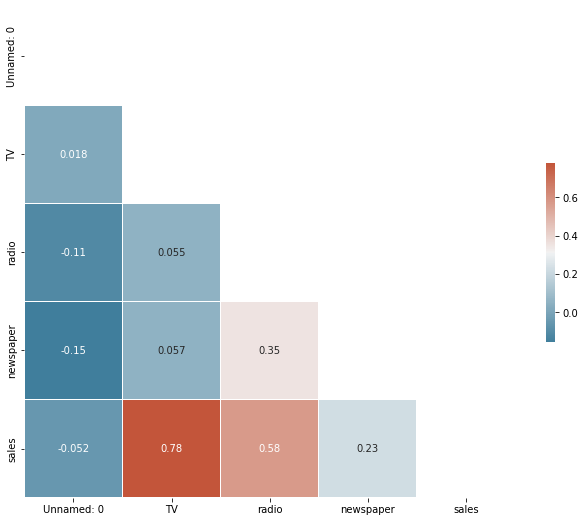

In [28]:
# To visualize the realtionship.
# Compute the correlation matrix
cormatrix=advertising_df.corr().round(3)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cormatrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cormatrix, mask=mask, cmap=cmap, annot = True,
            square=True, linewidths=.25, cbar_kws={"shrink": .3})

Strong correlation between TV and Sales : 0.78
Moderate correlation between Radio and Sales : 0.58
Weak correlation betweem Newspaper and Sales : 0.23

## Pair Plot

In [45]:
sns.pairplot(advertising_df, kind='reg')

TypeError: ignored

- Regression pair plot
- More positive slope between TV and Sales compared to radio with sales and newspaper with sales.
- Similar pattern like correlation matrix. 

## Feature Importance

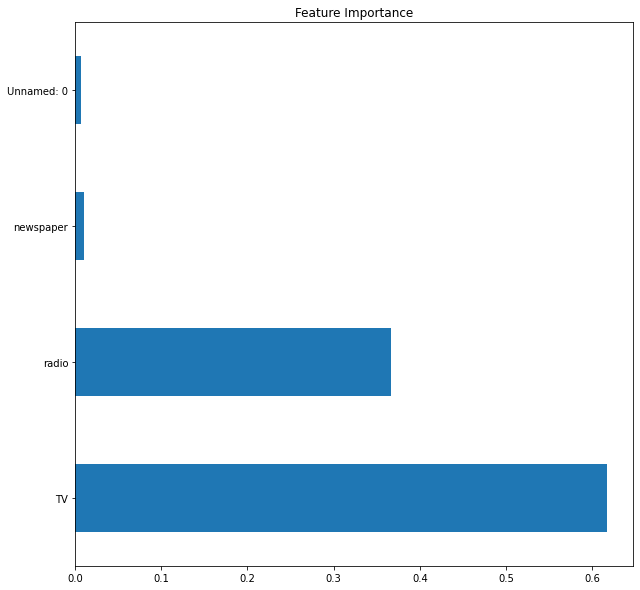

In [44]:
# Setting X and y variables
X = advertising_df.loc[:, advertising_df.columns != 'sales']
y = advertising_df['sales']# Building Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10), title='Feature Importance')

## Marketing Mix Model (OLS Model)

Ordinary Least Squares Regression Model

In [35]:
import statsmodels.formula.api as sm
model = sm.ols(formula="sales~TV+radio+newspaper", data=advertising_df).fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        02:40:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

Adj. R-squared:                  0.896 - This mode can explain approximately 90% of the total variations in the data. Rest can be missing marketing channel or noise in the data.

Prob (F-statistic):           1.58e-96 - p-value is close to zero-> there is at least one predictor in the model that is a good predictor of sales.(Reject null hypothesis).





Plotting Actual vs Predicted Values

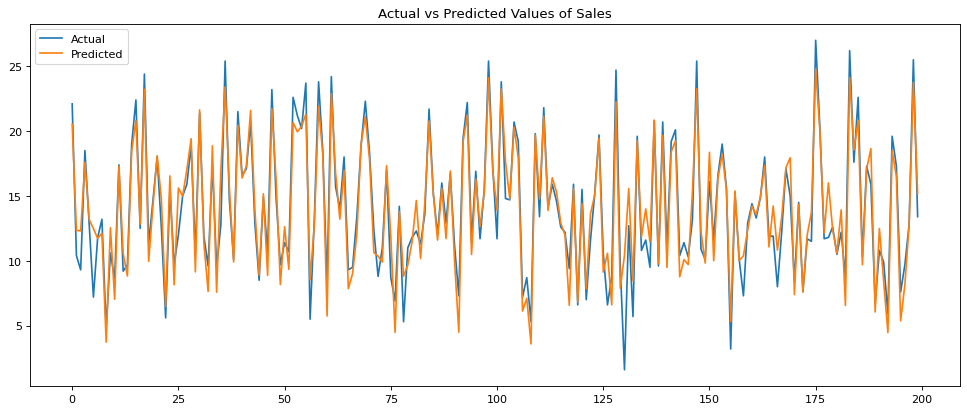

In [43]:
from matplotlib.pyplot import figure
y_pred = model.predict()
labels = advertising_df['sales']
df_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp.head()
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.title("Actual vs Predicted Values of Sales")
plt.legend()
plt.show()